In [2]:
from qutip import *
from qutip.qip.operations import *
import numpy as np
import matplotlib.pyplot as plt
import datetime
import random
from random import random 
from tqdm import tqdm
%matplotlib inline

# Filter function

In [111]:
def FF(w, tau, N):
    if tau < 1e-6:
        tau = 10e-6
    tauList = []
    tauList.append(0)
    tauList.append(tau/2)
    for i in range(N-1):
        t_append = tauList[-1]+tau
        tauList.append(t_append)
    t_append = tauList[-1]+tau/2
    tauList.append(t_append)

    ss = 0
    for i in range(len(tauList)):        
        ss += 2*(-1)**i*np.exp(1j*w*tauList[i])
    ss = ss-1-(-1)**(len(tauList)-1)*np.exp(1j*w*tauList[-1])
    ss = ss/w/1j
    return ss

def FWHM(X,Y):
    half_max = max(Y) / 2.
    #find when function crosses line half_max (when sign of diff flips)
    #take the 'derivative' of signum(half_max - Y[])
    d = np.sign(half_max - np.array(Y[0:-1])) - np.sign(half_max - np.array(Y[1:]))
    #find the left and right most indexes
    left_idx = np.where(d > 0)[0]
    right_idx = np.where(d < 0)[-1]
    return X[left_idx], X[right_idx] #return the difference (full width)

def find_bandwidth(f_small, f_big, f_center_list):
    if f_small and f_big:
        dl = np.sign(f_big - np.array(f_center_list))
        dr = np.sign(f_small - np.array(f_center_list))
  
        left_idx = [np.where(dl > 0)[0][0] if np.array(np.where(dl < 0)).size>0 else 0][0]
        right_idx = [np.where(dr < 0)[0][-1] if np.array(np.where(dr > 0)).size>0 else 0][0]
        if right_idx == 0:
            right_idx = -1
    elif f_small:
        dr = np.sign(f_small - np.array(f_center_list))
        right_idx = [np.where(dr < 0)[0][-1] if np.array(np.where(dr > 0)).size>0 else 0][0]
        left_idx = 0    
    elif f_big:
        dl = np.sign(f_big - np.array(f_center_list))
        left_idx = [np.where(dl > 0)[0][0] if np.array(np.where(dl < 0)).size>0 else 0][0]
        right_idx = 0
    else:   
        left_idx, right_idx = 0, 0
    
    return left_idx, right_idx 

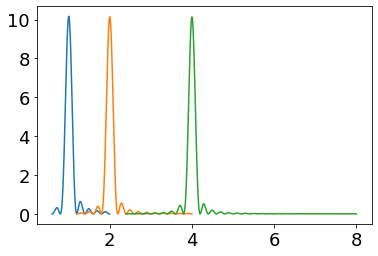

In [112]:
T = 5
tau = 500e-3
N = int(T/tau)
ws = np.linspace(0.3/tau*2*np.pi,1/tau*2*np.pi,1001)
ff_data = [np.abs(FF(w, tau, N))**2 for w in ws]
plt.plot(ws/2/np.pi, ff_data)

T = 5
tau = 250e-3
N = int(T/tau)
ws = np.linspace(0.3/tau*2*np.pi,1/tau*2*np.pi,1001)
ff_data = [np.abs(FF(w, tau, N))**2 for w in ws]
plt.plot(ws/2/np.pi, ff_data)

T = 5
tau = 125e-3
N = int(T/tau)
ws = np.linspace(0.3/tau*2*np.pi,1/tau*2*np.pi,1001)
ff_data = [np.abs(FF(w, tau, N))**2 for w in ws]
plt.plot(ws/2/np.pi, ff_data)

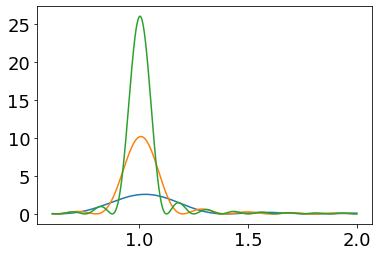

In [113]:
T = 2.5
tau = 500e-3
N = int(T/tau)
ws = np.linspace(0.3/tau*2*np.pi,1/tau*2*np.pi,1001)
ff_data = [np.abs(FF(w, tau, N))**2 for w in ws]
plt.plot(ws/2/np.pi, ff_data)

T = 5
tau = 500e-3
N = int(T/tau)
ws = np.linspace(0.3/tau*2*np.pi,1/tau*2*np.pi,1001)
ff_data = [np.abs(FF(w, tau, N))**2 for w in ws]
plt.plot(ws/2/np.pi, ff_data)

T = 8
tau = 500e-3
N = int(T/tau)
ws = np.linspace(0.3/tau*2*np.pi,1/tau*2*np.pi,1001)
ff_data = [np.abs(FF(w, tau, N))**2 for w in ws]
plt.plot(ws/2/np.pi, ff_data)

center freq is : 424.5833333333333
bandwidth is : [121.5]


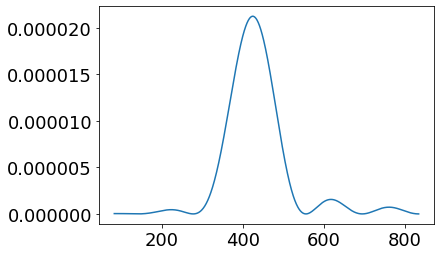

In [114]:
tau = 1.2e-3
N = 6
ws = np.linspace(0.1/tau*2*np.pi,1/tau*2*np.pi,1001)
ff_data = [np.abs(FF(w, tau, N))**2 for w in ws]
plt.plot(ws/2/np.pi, ff_data)

idx = np.argmax(ff_data)
fc = ws[idx]/2/np.pi
print('center freq is :', fc)
[w_small, w_big] = FWHM(ws,ff_data)
print('bandwidth is :',  w_big/2/np.pi-w_small/2/np.pi)

/Users/sunke/opt/anaconda3/lib/python3.7/site-packages/IPython/core/pylabtools.py:128: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


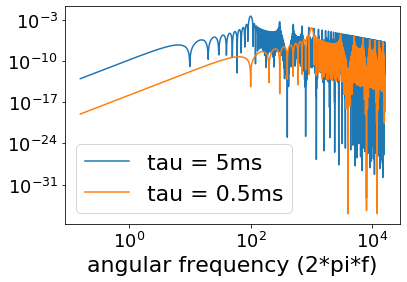

upper limit is  100000.0
Amp1 = 0.3133435175879882, Amp2 = 0.030601470888537388
Amp difference is  0.8220560152710238


In [115]:
ups = np.logspace(5, 5, 1)
for up in ups:    
    tau1 = 5e-3
    N = 20
    ws = np.linspace(1,up,100001)
    ff_data = [np.abs(FF(w, tau1, N))**2 for w in ws]
    plt.plot(ws/2/np.pi, ff_data, label = 'tau = 5ms')
    plt.xscale('log')
    plt.yscale('log')
    amp1 = np.trapz(ff_data,ws)

    tau2 = 0.5e-3
    N = 20
    ws = np.linspace(1,up,100001)
    ff_data = [np.abs(FF(w, tau2, N))**2 for w in ws]
    plt.plot(ws/2/np.pi, ff_data, label = 'tau = 0.5ms')
    plt.xscale('log')
    plt.yscale('log')
    amp2 = np.trapz(ff_data,ws)
    plt.xlabel('angular frequency (2*pi*f)')

    plt.legend()
    plt.show()
    print('upper limit is ', up)
    print('Amp1 = '+str(amp1)+', Amp2 = '+str(amp2))
    print('Amp difference is ', (amp1-amp2)/(amp1+amp2))

## The integrated area of filter function

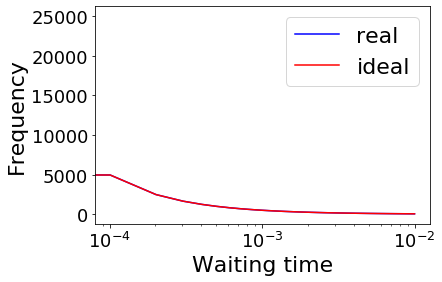

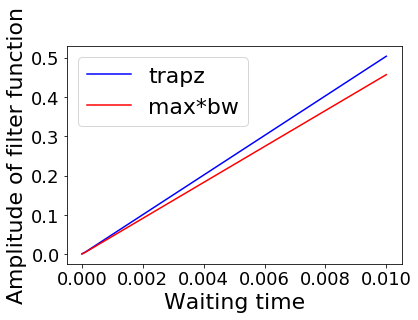

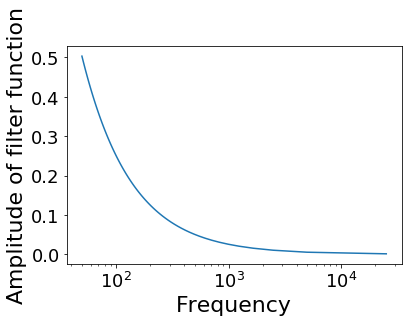

In [116]:
tau_list = np.linspace(0, 10e-3,100)
f_center_list = []
Freq = []
amp = []
amp_bw = []
bandwidth = []
N = 20
for tau in tau_list:
    if tau < 1e-6:
        tau = 20e-6
    ws = np.linspace(0.3/tau*2*np.pi,1/tau*2*np.pi,501)
    ff_data = [np.abs(FF(w, tau, N))**2 for w in ws] 
    idx = np.argmax(ff_data)
    f_center_list.append(ws[idx]/2/np.pi)
    Freq.append(0.5/tau)
    amp_s = np.trapz(ff_data, ws)
    amp.append(amp_s)
    bw = FWHM(ws,ff_data)
    bandwidth.append(FWHM(ws,ff_data))
    amp_bw.append((bw[1]-bw[0])*max(ff_data))
#     plt.plot(ws, ff_data)
#     plt.show()


plt.plot(tau_list, f_center_list, 'b', label = 'real')
plt.plot(tau_list, Freq, 'r', label = 'ideal')
plt.xlabel('Waiting time')
plt.ylabel('Frequency')
plt.xscale('log')
plt.legend()
plt.show()
plt.plot(tau_list, amp, 'b', label = 'trapz')
plt.plot(tau_list, amp_bw,'r', label = 'max*bw')
plt.xlabel('Waiting time')
plt.ylabel('Amplitude of filter function')
plt.legend()
plt.show()
plt.plot(f_center_list, amp)
plt.xlabel('Frequency')
plt.ylabel('Amplitude of filter function')
plt.xscale('log')
plt.show()

In [422]:
def NoiseSpectrum(tau_list, Prob, Freq_limit, peak_freq = 0, isPlot = True):
    f_center_list = []
    bandwidth = []
    amp = []
    SbPitime = 130e-6
    for tau0 in tau_list:
        tau = tau0+SbPitime
        ws = np.linspace(0.3/tau*2*np.pi,1/tau*2*np.pi,1001)
        ff_data = [np.abs(FF(w, tau, N))**2 for w in ws]
        idx = np.argmax(ff_data)
        f_center_list.append(ws[idx]/2/np.pi)
        amp.append(np.trapz(ff_data, ws))
        bandwidth.append(FWHM(ws,ff_data))
    idxs = []
    
    
    for bw in bandwidth:
        #amp.append(np.trapz(ff_data, ws))
        [w_small, w_big] = bw
        [idx_l, idx_r] = find_bandwidth(w_small/2/np.pi, w_big/2/np.pi, f_center_list)
        idxs.append([idx_l, idx_r])
    cnt = 0

    # Raw noise spectrum
    NS = []
    FNs = []
    FN2s = []
    exps = []
    for i in range(len(Prob)):
        meas_z = (Prob[i]-0.5)*2

        FN2 = -np.log(meas_z)/2
        NS.append(FN2*np.pi/amp[i])
    
    # Noise spectrum considering the bandwidth
    cnt = 0
    NS_avg = []
    for idx in idxs:
        idx_l = idx[0]
        idx_r = idx[1] 
        if idx_r == -1:
            NS_avg.append(sum(NS[idx_l:idx_r]) / len(NS[idx_l:idx_r]))
        else:
            NS_avg.append(sum(NS[idx_l:idx_r+1]) / len(NS[idx_l:idx_r+1]))
        cnt+=1 
        
    if isPlot:
        fig = plt.figure(figsize=(10, 10), dpi=80)
        ax1 = fig.add_subplot(2, 1, 1)
        ax1.axvline(x = Freq_limit[0])
        ax1.axvline(x = Freq_limit[1])
        ax1.plot(f_center_list, NS, '.', color='blue', lw=2)
        ax1.set_xlim([Freq_limit[0]*0.9,Freq_limit[1]*1.1])
        ax1.set_xlabel('Frequency (Hz)')
        ax1.set_ylabel('Noise spectrum (a.u.)')

        ax2 = fig.add_subplot(2, 1, 2)
        ax2.plot(f_center_list, NS, '.', color='blue', lw=2)
        ax2.axvline(x = Freq_limit[0])
        ax2.axvline(x = Freq_limit[1])
        ax2.set_xscale('log')
        ax2.set_yscale('log')
        ax2.set_xlim([Freq_limit[0]*0.9,Freq_limit[1]*1.1])
        ax2.set_xlabel('Frequency (Hz)')
        ax2.set_ylabel('Noise spectrum (a.u.)')

        fig = plt.figure(figsize=(10, 10), dpi=80)
        ax1 = fig.add_subplot(2, 1, 1)
        ax1.axvline(x = Freq_limit[0])
        ax1.axvline(x = Freq_limit[1])
        ax1.plot(f_center_list, NS_avg, '.', color='blue', lw=2)
        if peak_freq > 0:
            ax1.axvline(x = peak_freq, label = str(peak_freq)+'Hz')
        ax1.legend()
        ax1.set_xlim([Freq_limit[0]*0.9,Freq_limit[1]*1.1])
        ax1.set_xlabel('Frequency (Hz)')
        ax1.set_ylabel('Noise spectrum (a.u.)')

        ax2 = fig.add_subplot(2, 1, 2)
        ax2.plot(f_center_list, NS_avg, '.', color='blue', lw=2)
        if peak_freq > 0:
            ax2.axvline(x = peak_freq, label = str(peak_freq)+'Hz')
        ax2.legend()
        ax2.axvline(x = Freq_limit[0])
        ax2.axvline(x = Freq_limit[1])
        ax2.set_xscale('log')
        ax2.set_yscale('log')
        ax2.set_xlim([Freq_limit[0]*0.9,Freq_limit[1]*1.1])
        ax2.set_xlabel('Frequency (Hz)')
        ax2.set_ylabel('Noise spectrum (a.u.)')
    
    idx_max = np.argmax(NS_avg)
    print(f_center_list[idx_max])
    print('Bandwidth is:', f_center_list[idxs[idx_max][0]] - f_center_list[idxs[idx_max][1]])
    return f_center_list, NS_avg

In [189]:
from scipy.special import jv
import scipy
                           
def NoiseSpectrum_coherent_get_guess(tau_list, Contrast, cnt):
    SbPitime = 130e-6
    tau_list_c2c = [tau + SbPitime for tau in tau_list]
    w_list = [0.5/(tau)*2*np.pi for tau in tau_list_c2c]
    f_list = [0.5/(tau) for tau in tau_list_c2c]
    FF_list = []
    for tau in tau_list_c2c:
        FF_list.append([FF(w, tau, N) for w in w_list])
        
    def _cost_func(beta_list):
        result = 1
        for i in range(len(beta_list)):
            result = result*jv(0, np.abs(beta_list[i]*FF_list[i][cnt]))
        return result-Contrast[cnt]
    beta_list_guess = np.array([1]*len(tau_list))   
    res = scipy.optimize.minimize(_cost_func, np.array([1]*len(tau_list)))
     
    return res.x

In [386]:
from scipy.special import jv
import scipy

def Bessel(x):
    return 1-x**2/4+x**4/64-x**6/2304

def NoiseSpectrum_coherent_get_guess(tau_list, Contrast, N):
    SbPitime = 130e-6
    
    f_center_list = []
    SbPitime = 130e-6
    tau_list_c2c = [tau + SbPitime for tau in tau_list]
    for tau in tau_list_c2c:
        ws = np.linspace(0.3/tau*2*np.pi,1/tau*2*np.pi,1001)
        ff_data = [np.abs(FF(w, tau, N))**2 for w in ws]
        idx = np.argmax(ff_data)
        f_center_list.append(ws[idx]/2/np.pi)
    
    w_list = [f*2*np.pi for f in f_center_list]
    len_data = len(f_center_list)
    
    beta_list_guess = []
    for i in tqdm(range(len_data)):
        def _cost_func(beta):
            return np.abs(jv(0, np.abs(beta*np.abs(FF(w_list[i], tau_list_c2c[i], N)))) - Contrast[i])
        bd = 30/np.abs(FF(w_list[i], tau_list_c2c[i], N))
#         print(bd)
#         beta_list_guess.append(scipy.optimize.minimize(_cost_func, 1.0).x)
        beta_list_guess.append(scipy.optimize.least_squares(_cost_func, 0.1, bounds = ((-bd),(bd)), \
                                                            method='dogbox', ftol = 1e-15, xtol = 1e-15).x)
    return f_center_list, beta_list_guess    



[array([0.1]), array([0.1]), array([0.1]), array([2575.79876408]), array([2419.69889359]), array([1840.76140364]), array([2334.21140826]), array([1841.39663156]), array([1874.81714341]), array([1734.87845815]), array([1834.02324859]), array([1436.11202012]), array([1569.7022728]), array([1331.4707111]), array([1901.80291652]), array([1193.38881317]), array([1218.28319894]), array([1170.81761962]), array([1149.35697443]), array([1414.92671048]), array([1321.77673585]), array([1153.99215693]), array([820.33767116]), array([1339.61814632]), array([808.36272684]), array([1181.70053383]), array([1111.02551889]), array([1097.55909364]), array([884.74128031]), array([989.51460625]), array([963.92357393]), array([727.27392447]), array([994.16350002]), array([924.37214917]), array([947.56208599]), array([1148.34625736]), array([980.75771587]), array([899.63172655]), array([954.03778213]), array([834.6283644]), array([728.22366193]), array([689.29731824]), array([699.47803867]), array([988.7100

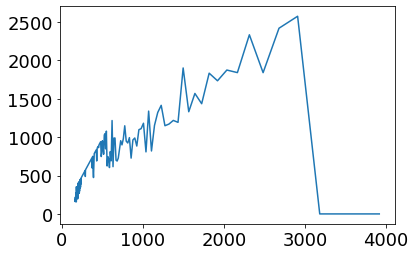

In [387]:
f_center_list, beta_list_guess  = NoiseSpectrum_coherent_get_guess(tau_list3, Contrast3, N = 6)
plt.plot(f_center_list, beta_list_guess)
print(beta_list_guess)

In [241]:
def NoiseSpectrum_coherent_fsolve(tau_list, Contrast, beta_list_guess):
    SbPitime = 130e-6
    tau_list_c2c = [tau + SbPitime for tau in tau_list]
    w_list = [0.5/(tau)*2*np.pi for tau in tau_list_c2c]
    f_list = [0.5/(tau) for tau in tau_list_c2c]
    FF_list = []
    for tau in tau_list_c2c:
        FF_list.append([FF(w, tau, N) for w in w_list])
    
    N_sample = len(tau_list)
    def _func(beta_list):
        F = np.zeros(N_sample)
        for cnt in range(N_sample):
            result = 1
            for i in range(len(beta_list)):
                result = result*jv(0, np.abs(beta_list[i]*FF_list[i][cnt]))
            F[cnt] = result-Contrast[cnt]
        return F
    #beta_list_guess = np.array([1]*len(tau_list))   
    
    res = scipy.optimize.fsolve(_func, beta_list_guess)
     
    fig = plt.figure(figsize=(10, 10), dpi=80)
    ax = fig.add_subplot(2, 1, 1)
    ax.plot(f_list, abs(res))
    #ax.set_xscale('log')
    ax.set_xlabel('Frequency (Hz)')
    ax.set_ylabel('Noise spectrum (a.u.)')
    return res

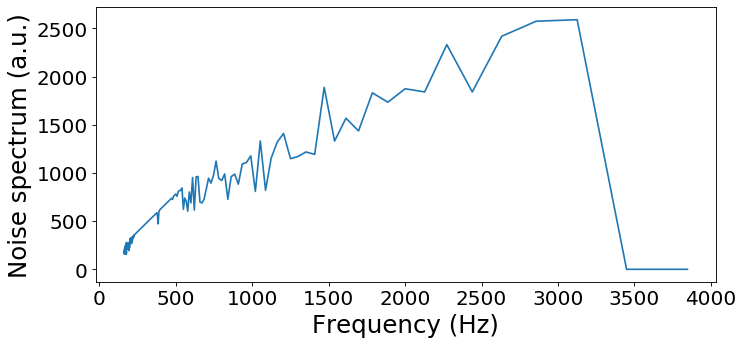

In [365]:
res = NoiseSpectrum_coherent_fsolve(tau_list3, Contrast3, beta_list_guess)

Text(0, 0.5, '$S_\\beta(\\omega) (2\\pi Hz)$')

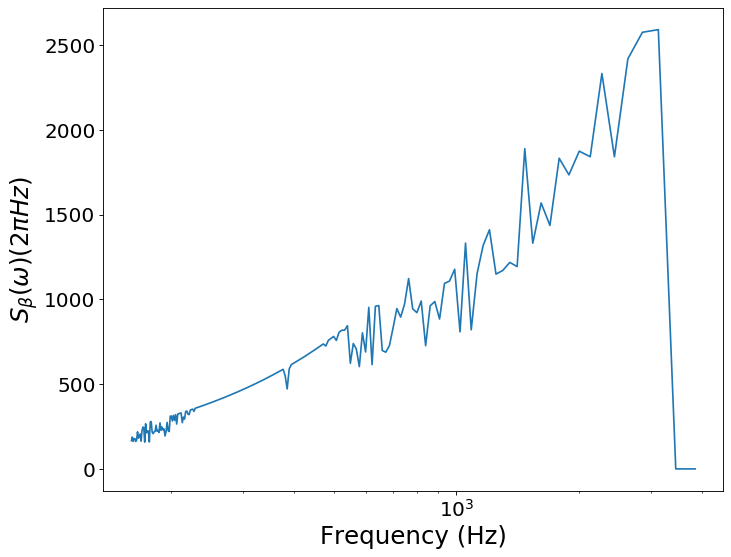

In [366]:
fig = plt.figure(figsize=(10, 8), dpi=80)
ax = fig.add_subplot(1, 1, 1)
ax.plot(f_list,np.abs(res))
ax.set_xscale('log')
ax.set_xlabel('Frequency (Hz)')
ax.set_ylabel(r'$S_\beta(\omega) (2\pi Hz)$')

In [367]:
def F_func(beta_list, tau_list):
    SbPitime = 130e-6    
    f_center_list = []
    tau_list_c2c = [tau + SbPitime for tau in tau_list]
    for tau in tau_list_c2c:
        ws = np.linspace(0.3/tau*2*np.pi,1/tau*2*np.pi,1001)
        ff_data = [np.abs(FF(w, tau, N))**2 for w in ws]
        idx = np.argmax(ff_data)
        f_center_list.append(ws[idx]/2/np.pi)

    w_list = [f*2*np.pi for f in f_center_list]
    len_data = len(f_center_list)
    
    FF_list = []
    for tau in tau_list_c2c:
        FF_list.append([FF(w, tau, N) for w in w_list])
    
    F = np.zeros(len_data)
    for cnt in tqdm(range(len_data)):
        result = 1
        for i in range(len(beta_list)):
            result = result*jv(0, np.abs(beta_list[i]*FF_list[i][cnt]))
        F[cnt] = result
    return F

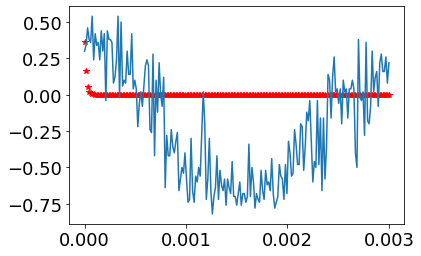

In [368]:
F = F_func(res, tau_list3)

plt.plot(tau_list3, F, 'r*')
plt.plot(tau_list3, Contrast3)

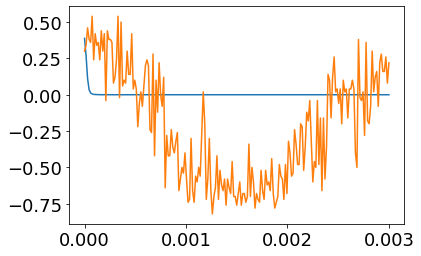

In [377]:
F2 = F_func(beta_list_guess, tau_list3)

plt.plot(tau_list3, F2)
plt.plot(tau_list3, Contrast3)

## Check the CPMG with a given coherent noise: $\beta(t) = \beta_0 cos(\omega_0t+\phi)$


In [418]:
def FN(tau, beta_0, w_0, phi, N):
    result = np.sin(phi)+np.sin(w_0*N*tau+phi)
    for i in range(N):
        result += 2*(-1)**(i+1)*np.sin(w_0*(i+1/2)*tau+phi)
    return result*beta_0/w_0

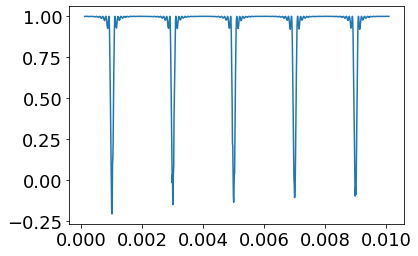

In [419]:
import random as rd
tau_ls = np.linspace(0, 10e-3, 1001)+100e-6
beta_0 = 100
w_0 = 0.5e3*2*np.pi
N = 20   # N should be even
N_sample = 100
Cont = []
for tau in tau_ls:
    temp = 0
    for i in range(N_sample):
        phi = rd.random()*2*np.pi
        temp += np.cos(2*FN(tau, beta_0, w_0, phi, N))
    Cont.append(temp/N_sample)
plt.plot(tau_ls, Cont)

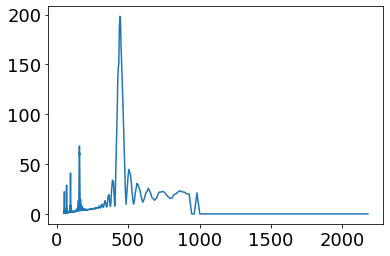

In [420]:
f_center_list_test, beta_list_guess_test  = NoiseSpectrum_coherent_get_guess(tau_ls, Cont, N)
plt.plot(f_center_list_test, beta_list_guess_test)
# print(beta_list_guess_test)

/Users/sunke/opt/anaconda3/lib/python3.7/site-packages/scipy/optimize/minpack.py:175: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last five Jacobian evaluations.
  warnings.warn(msg, RuntimeWarning)


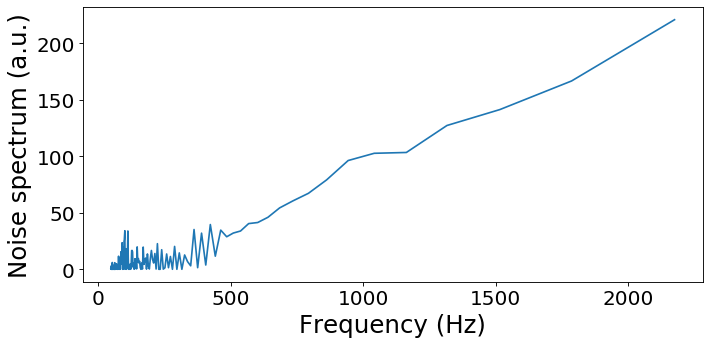

In [414]:
res_test = NoiseSpectrum_coherent_fsolve(tau_ls, Cont, beta_list_guess_test)

In [415]:
def F_func_test(beta_list, tau_list, N):
    SbPitime = 0   
    f_center_list = []
    tau_list_c2c = [tau + SbPitime for tau in tau_list]
    for tau in tau_list_c2c:
        ws = np.linspace(0.3/tau*2*np.pi,1/tau*2*np.pi,1001)
        ff_data = [np.abs(FF(w, tau, N))**2 for w in ws]
        idx = np.argmax(ff_data)
        f_center_list.append(ws[idx]/2/np.pi)

    w_list = [f*2*np.pi for f in f_center_list]
    len_data = len(f_center_list)
    
    FF_list = []
    for tau in tau_list_c2c:
        FF_list.append([FF(w, tau, N) for w in w_list])
    
    F = np.zeros(len_data)
    for cnt in tqdm(range(len_data)):
        result = 1
        for i in range(len(beta_list)):
            result = result*jv(0, np.abs(beta_list[i]*FF_list[i][cnt]))
        F[cnt] = result
    return F, FF_list, f_center_list

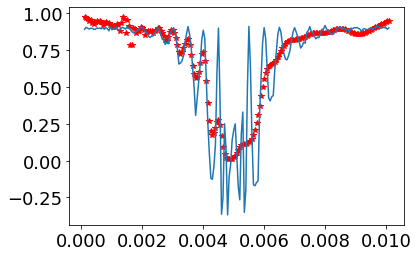

In [416]:
F_test, FF_list_test, f_center_list = F_func_test(res_test, tau_ls, N)

plt.plot(tau_ls, F_test, 'r*')
plt.plot(tau_ls, Cont)

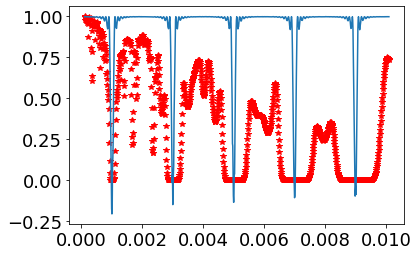

In [421]:
F2_test, FF_list_test, f_center_list  = F_func_test(beta_list_guess_test, tau_ls, N)

plt.plot(tau_ls, F2_test, 'r*')
plt.plot(tau_ls, Cont)

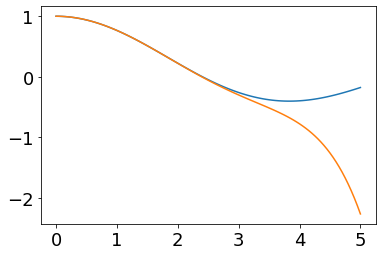

In [324]:
x_list = np.linspace(0,5, 101)
plt.plot(x_list, jv(0, x_list))
plt.plot(x_list, 1-x_list**2/4+x_list**4/64-x_list**6/2304)

In [270]:
jv(0,2.4)

0.002507683297243825

# CPMG analysis

In [423]:
SMALL_SIZE = 18
MEDIUM_SIZE = 22
BIGGER_SIZE = 26

plt.rc('font', size=BIGGER_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=BIGGER_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=MEDIUM_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

In [424]:
def readFile(filename, figurename):
    timeTickFirst, timeTickLast, x, PMT1, PMT1_raw, PMT1_bottom, PMT1_top, PMT2, PMT2_raw, PMT2_bottom, \
    PMT2_top = np.loadtxt(filename, comments='#', delimiter='\t', converters=None, skiprows=0,unpack=True, 
                          encoding='latin1')
    
    ## Sort the randimized data by the order of tau
    data = {}
    for i in range(len(x)):
        data[x[i]] = PMT1[i]
    odata = sorted(data.items()) # sorted by key, return a list of tuples

    ## Plot the data
    tau_list, Prob = zip(*odata) # unpack a list of pairs into two tuples
    fig = plt.figure(figsize=(10, 8), dpi=80)
    plt.plot([tau_list[i]/1e6 for i in range(len(x))], Prob, '.')
    plt.plot([tau_list[i]/1e6 for i in range(len(x))], Prob, 'c-')
    plt.ylim([0,1])
    plt.xlabel('Waiting time (s)')
    plt.ylabel('Prob of excited state')
    plt.title(figurename)
    plt.show()
    return [tau_list[i]/1e6 for i in range(len(x))], Prob

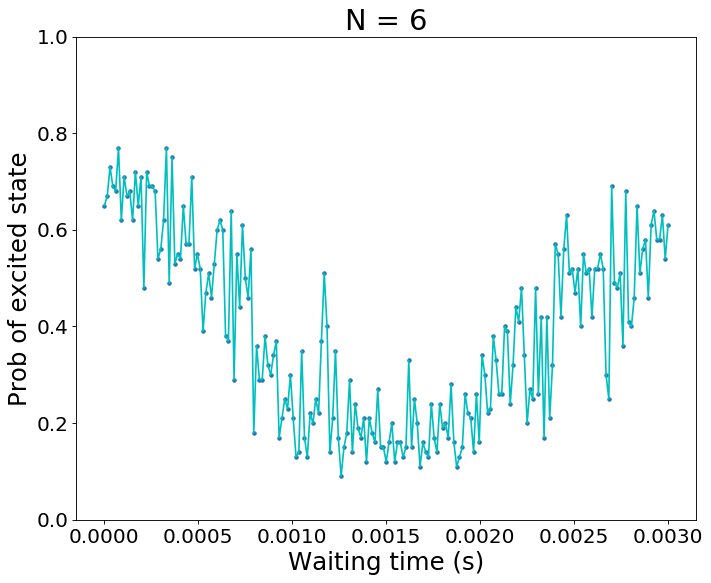

In [442]:
# test
SbPitime = 130e-6
tau_m = 3e-3
tau_list3, Prob3 = readFile('HighContrast_CPMG_Time_004','N = 6')

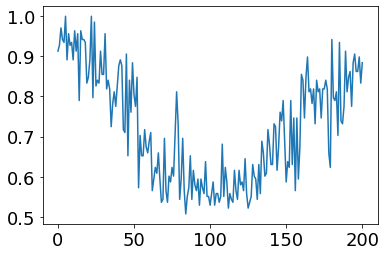

In [440]:
Prob_3_cal = (np.array(Prob3) - min(Prob3)+0.01)/(max(Prob3)-min(Prob3)+0.01)/2+0.5
plt.plot(Prob_3_cal)

424.49152542372883
Bandwidth is: 32.42362671941032


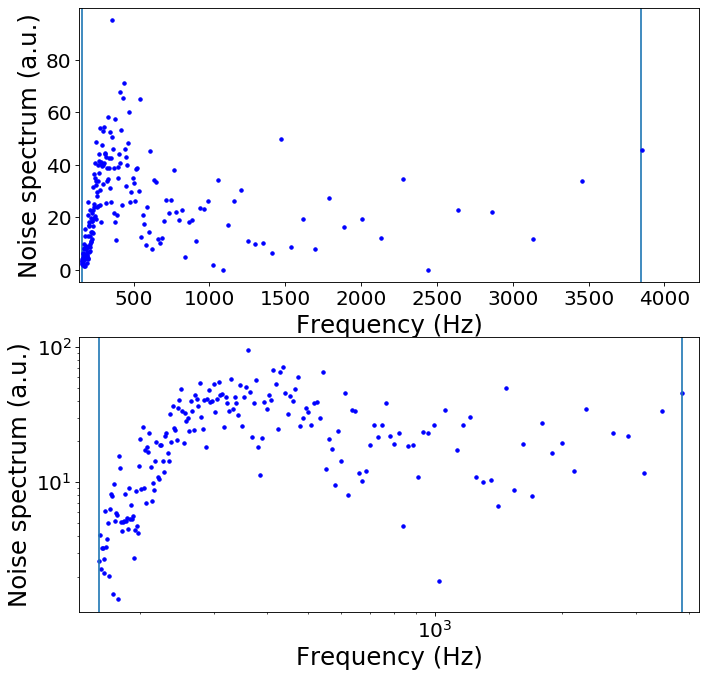

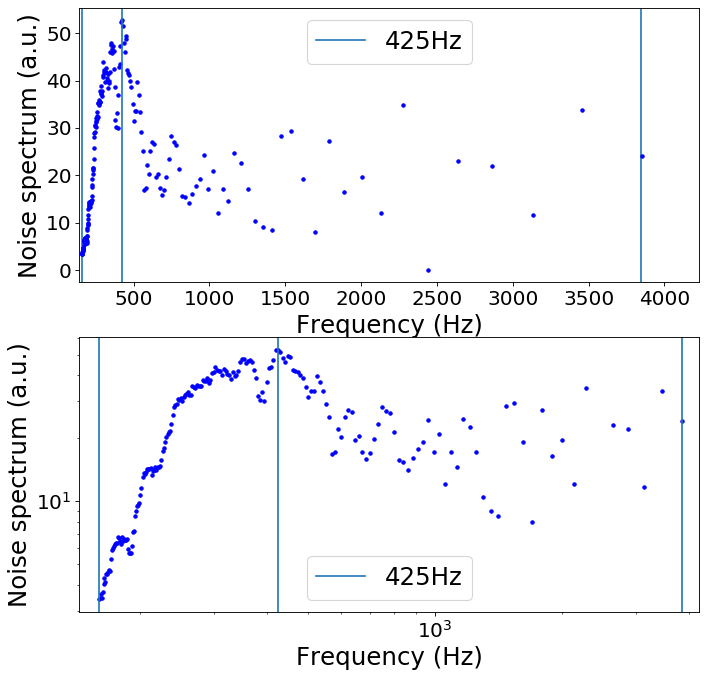

In [447]:
Freq_limit = [0.5/(max(tau_list3)+130e-6), 0.5/130e-6]
f_3, NS_avg_3 = NoiseSpectrum(tau_list3, Prob_3_cal, Freq_limit, peak_freq = 425, isPlot = True)

Text(0, 0.5, 'Noise spectrum (a.u.)')

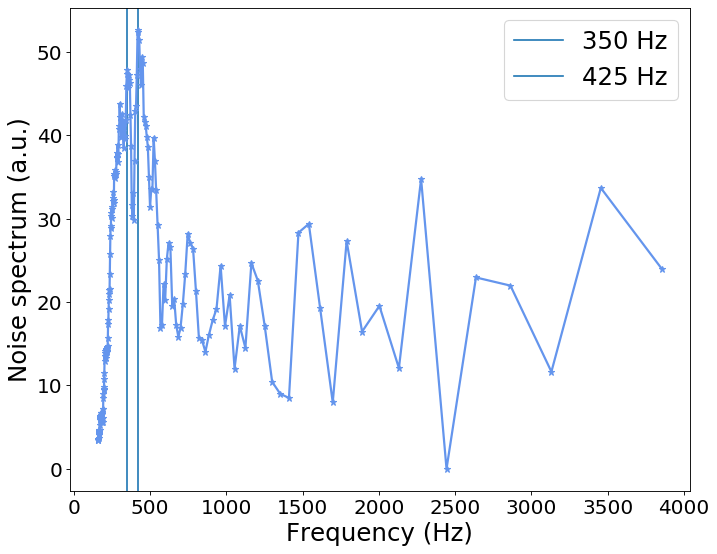

In [449]:
fig = plt.figure(figsize=(10, 8), dpi=80)
ax1 = fig.add_subplot(1, 1, 1)
ax1.axvline(x = 350, label = '350 Hz')
ax1.axvline(x = 425, label = '425 Hz')
ax1.plot(f_3, NS_avg_3, '-*', color='cornflowerblue', lw=2)
ax1.legend()
ax1.set_xlabel('Frequency (Hz)')
ax1.set_ylabel('Noise spectrum (a.u.)')
#print('Bandwidth is:', f_3[idxs[idx_max][0]] - f_center_list[idxs[idx_max][1]])